In [1]:
from __future__ import print_function, division
%matplotlib inline
import statsmodels.formula.api as smf  
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import sys
from scipy import stats
from fiona.crs import from_epsg

In [2]:
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12,10)

#### 1.traffic

In [3]:
df = pd.read_csv("zip_traffic_counts.csv")
dftraf = df.iloc[:, 2:4]
dftraf.rename(columns={'Zip Code': 'zip_code',
                       'Count': 'traffic'}, inplace=True)
dftraf['zip_code'] = dftraf['zip_code'].astype(int)
dftraf['traffic'] = dftraf['traffic'] / 1e4
dftraf.head()

,zip_code,traffic
0,11436,0.747437
1,11213,1.486010
2,11212,1.163750
3,11225,1.026300
4,11218,0.919088


In [4]:
dftraf.shape

(263, 2)

In [5]:
dftraf.dtypes

zip_code      int64
traffic     float64
dtype: object

In [6]:
dftraf.describe()

,zip_code,traffic
count,263.000000,263.000000
mean,10629.174905,0.991602
std,874.151510,1.015465
min,83.000000,0.000000
25%,10113.500000,0.000000
50%,10459.000000,0.943464
75%,11234.500000,1.535992
max,11697.000000,10.332400


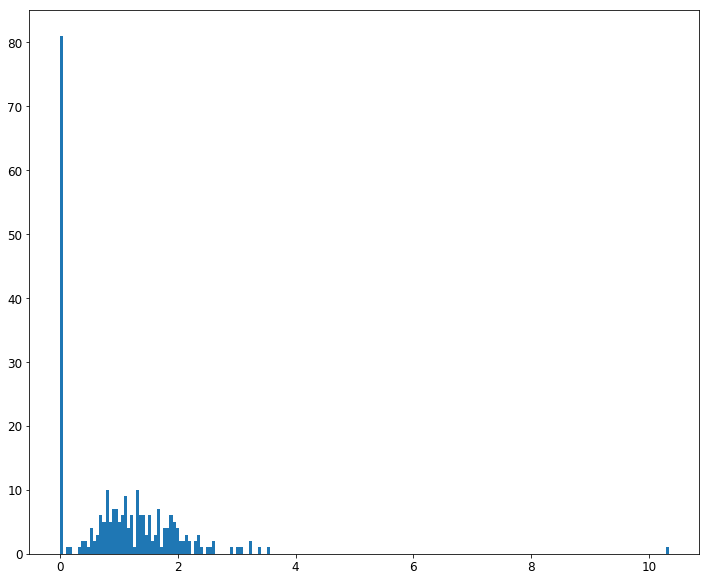

In [7]:
plt.hist(dftraf['traffic'], bins=200)
plt.show()

In [8]:
dftraf.sort_values(by='traffic', ascending=False, inplace=True)
dftraf.head()

,zip_code,traffic
196,10075,10.332400
127,11239,3.537750
125,11430,3.391286
21,10034,3.238600
81,10017,3.207457


In [9]:
#cut off the outliers
dftraf = dftraf[dftraf['traffic']<9]

#### 2. GHG

In [10]:
df = pd.read_csv("ghg_zip.csv")
dfghg = df.iloc[:, 1:]
dfghg.rename(columns={'Postcode': 'zip_code',
                       'Total GHG Emissions(MtCO2e)': 'GHG'}, inplace=True)
dfghg['zip_code'] = dfghg['zip_code'].astype(int)
dfghg['GHG'] = dfghg['GHG'] / 1e2
dfghg.head()

,zip_code,GHG
0,10001,8.287515
1,10002,10.906622
2,10003,9.272508
3,10004,19.637542
4,10005,18.238200


In [11]:
dfghg.shape

(183, 2)

In [12]:
dfghg.dtypes

zip_code      int64
GHG         float64
dtype: object

#### 3. boiler

In [13]:
df = pd.read_csv("boiler_estimate_cosumption_2015_byzipcode.csv")
dfboil = df.iloc[:, 1:3]
dfboil.rename(columns={'total_consumption_gallons': 'boiler'}, inplace=True)
dfboil['zip_code'] = dfboil['zip_code'].astype(int)
dfboil['boiler'] = dfboil['boiler'] / 1e6
dfboil.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,zip_code,boiler
0,10001,12.352480
1,10002,1.850799
2,10003,9.808501
3,10004,1.081638
4,10005,0.085200


In [14]:
dfboil.shape

(157, 2)

#### 4. construction

In [15]:
df = pd.read_csv("DOB_impact_2015_byzipcode.csv")
dfcons = df.iloc[:, 1:]
dfcons.rename(columns={'total_impact_days': 'construction'}, inplace=True)
dfcons['zip_code'] = dfcons['zip_code'].astype(int)
dfcons['construction'] = dfcons['construction'] / 1e5
dfcons.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,zip_code,construction
0,0,0.00041
1,10000,0.00878
2,10001,15.26615
3,10002,8.31002
4,10003,13.38875


In [16]:
dfcons.shape

(222, 2)

#### 5. pm25

In [17]:
df = pd.read_csv("pm25_2015_byzipcode.csv")
dfpm = df.iloc[:, 1:]
dfpm.rename(columns={'ZIP Codes': 'zip_code',
                     'total_impact_days': 'construction'}, inplace=True)
dfpm['zip_code'] = dfpm['zip_code'].astype(int)
dfpm.head()

,zip_code,pm
0,10453,9.7
1,10457,9.7
2,10460,9.7
3,10458,9.1
4,10467,9.1


In [18]:
dfpm.shape

(178, 2)

### Merge

In [19]:
df = pd.merge(dftraf, dfghg, on='zip_code').drop_duplicates('zip_code')
df = pd.merge(df, dfboil, on='zip_code').drop_duplicates('zip_code')
df = pd.merge(df, dfcons, on='zip_code').drop_duplicates('zip_code')
df = pd.merge(df, dfpm, on='zip_code').drop_duplicates('zip_code')
df.head()

,zip_code,traffic,GHG,boiler,construction,pm
0,10034,3.238600,5.843254,8.135459,1.84321,9.4
1,10017,3.207457,15.110683,5.828683,10.36213,11.7
2,10009,3.061214,7.629542,0.668625,6.21836,10.1
3,10475,3.047788,8.099875,0.149358,1.56980,9.1
4,10011,2.921608,7.716256,10.009715,16.54263,11.4


In [20]:
df.shape

(147, 6)

In [21]:
df.describe()

,zip_code,traffic,GHG,boiler,construction,pm
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,10756.061224,1.383261,7.611108,3.276163,4.746461,9.217007
std,566.500701,0.644128,3.279018,4.548130,3.813139,0.997076
min,10001.000000,0.000000,2.395000,0.014400,0.413530,7.300000
25%,10042.000000,0.944475,5.345096,0.259898,2.250675,8.400000
50%,11101.000000,1.323044,6.562716,1.237908,3.385710,9.200000
75%,11236.000000,1.797184,9.268738,4.431391,6.218535,9.800000
max,11435.000000,3.238600,19.637542,23.574525,16.932390,11.700000


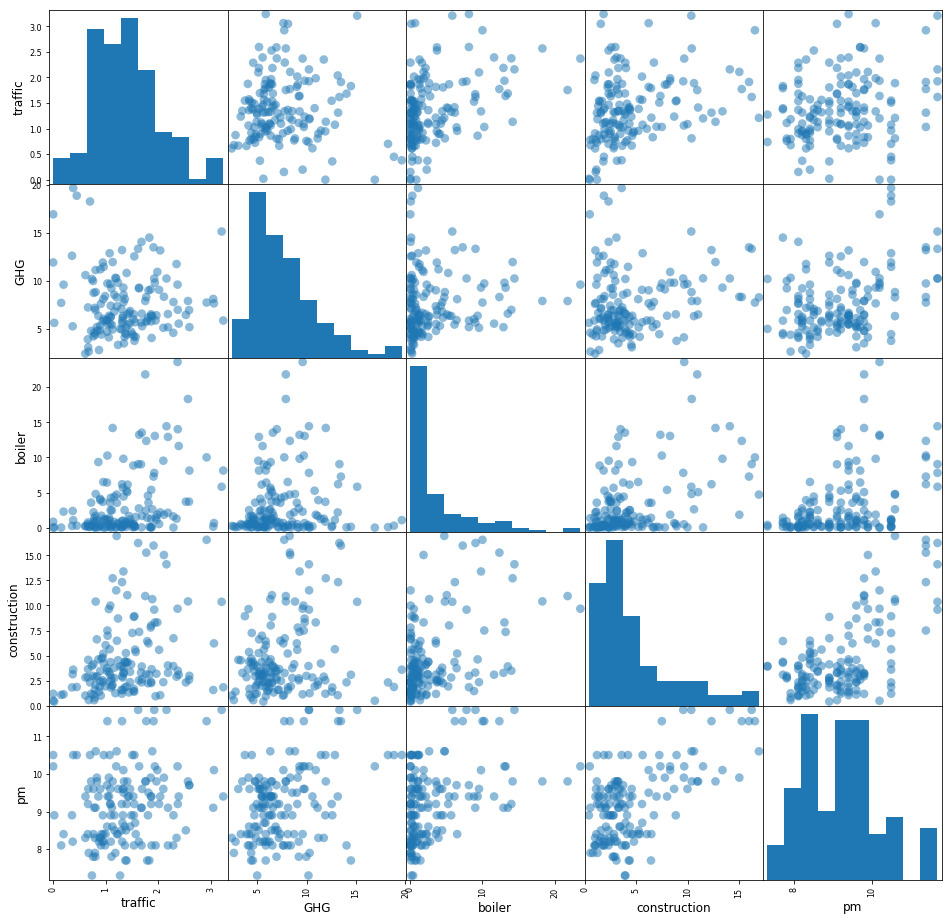

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix (df.iloc[:, 1:], s=300, figsize=(16, 16))
plt.show()

## Regression

#### We assign alpha=0.05

In [23]:
#model 1
lm1 = smf.ols('pm ~ traffic + GHG + boiler + construction', data=df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     32.34
Date:                Tue, 21 Nov 2017   Prob (F-statistic):           3.75e-19
Time:                        01:20:25   Log-Likelihood:                -160.05
No. Observations:                 147   AIC:                             330.1
Df Residuals:                     142   BIC:                             345.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.8276      0.208     37.675      0.000       7.417       8.238
traffic          0.0294      0.104      0.282      0.778      -0.177       0.236
GHG              0.0826      0.019      4.356      0.000       0.045       0.120
boiler           0.0388      0.016      2.482      0.014       0.008       0.070
construction     0.1249      0.018      6.808      0.000       0.089       0.161
==============================================================================
Omnibus:                        2.218   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.330   Jarque-Bera (JB):                1.727
Skew:                          -0.092   Prob(JB):                        0.422
Kurtosis:                       2.502   Cond. No.                         38.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#model 2
lm2 = smf.ols('pm ~ GHG + boiler + construction', data=df).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     43.37
Date:                Tue, 21 Nov 2017   Prob (F-statistic):           5.40e-20
Time:                        01:20:25   Log-Likelihood:                -160.09
No. Observations:                 147   AIC:                             328.2
Df Residuals:                     143   BIC:                             340.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.8646      0.160     49.040      0.000       7.548       8.182
GHG              0.0819      0.019      4.369      0.000       0.045       0.119
boiler           0.0401      0.015      2.703      0.008       0.011       0.070
construction     0.1258      0.018      6.999      0.000       0.090       0.161
==============================================================================
Omnibus:                        2.473   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.854
Skew:                          -0.094   Prob(JB):                        0.396
Kurtosis:                       2.483   Cond. No.                         28.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
LRresult = lm1.compare_lr_test(lm2)
print ('The likelihood ratio test result: p-value = {:.3f}'.format(LRresult[1]))
print ('We can not reject the Null hypothsis. We think the model 1 is not better than model 2.')

The likelihood ratio test result: p-value = 0.774
We can not reject the Null hypothsis. We think the model 1 is not better than model 2.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


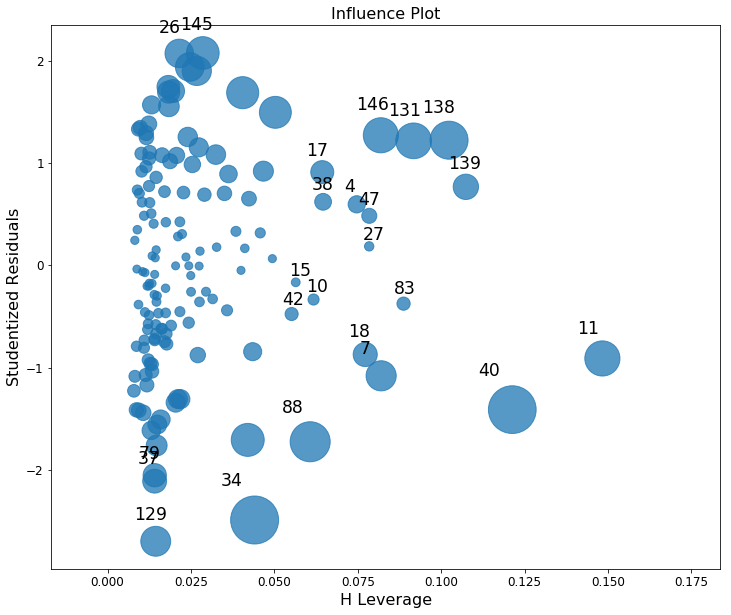

Figure . The influence plot. Cook's distance is used to estimate the influence of data points.


In [26]:
import statsmodels.api as sm
sm.graphics.influence_plot(lm2, alpha  = 0.05, criterion="cooks")
plt.show()
print ("\033[1mFigure . The influence plot.\033[0m Cook's distance is used to estimate " +
       "the influence of data points.")